In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from math import sqrt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
unpickled_df = pd.read_pickle("./saleprice_1.pkl")
unpickled_df.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,yrsold,salecondition,saleprice,years_before_sale,years_since_remodel,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,2008,Normal,208500,5,5,0,0,1,0,1
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,2007,Normal,181500,31,31,0,0,1,0,1
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,2008,Normal,223500,7,6,0,0,1,0,1
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,2006,Abnorml,140000,91,36,0,0,1,0,1
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,2008,Normal,250000,8,8,0,0,1,0,1


In [4]:
unpickled_df = pd.concat([unpickled_df,pd.get_dummies(unpickled_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
unpickled_df = pd.concat([unpickled_df,pd.get_dummies(unpickled_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(unpickled_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(unpickled_df.street, prefix="street", drop_first=True).columns)


In [5]:
unpickled_df.head()

# Modelling

X = unpickled_df[['mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'masvnrarea', 'bsmtfinsf1', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'grlivarea', 'bsmtfullbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'screenporch',
       'poolarea'] + dummy_column_names]
y = unpickled_df.saleprice
X_train, X_test, y_train, y_test = train_test_split(X, y)


Score, Root Mean Squared Error values
_____________________________________________________________________________
Ridge =  (0.7922770606349561, 36661.96306144208)
_____________________________________________________________________________
Lasso =  (0.7870047699993227, 37124.31291298426)
_____________________________________________________________________________
ElasticNet =  (0.7796387817788949, 37760.789690232)
_____________________________________________________________________________
Selected Features for RamdomForest [1.54695954e-03 4.97711844e-03 2.41124497e-02 6.31442140e-01
 6.94250575e-03 1.79217678e-02 3.18760575e-02 5.95778570e-03
 2.99148301e-02 2.15556868e-02 2.02331210e-02 7.61116097e-02
 8.39720877e-04 1.45622014e-02 2.69472802e-04 3.53518830e-03
 1.30803301e-03 2.35135120e-03 2.82968187e-03 9.89641282e-03
 5.88695018e-02 1.63614990e-02 2.95735943e-03 4.57038359e-03
 1.62560565e-04 4.24285064e-03 9.08083076e-06 0.00000000e+00
 2.80065218e-05 2.98591585e-05 4.88449

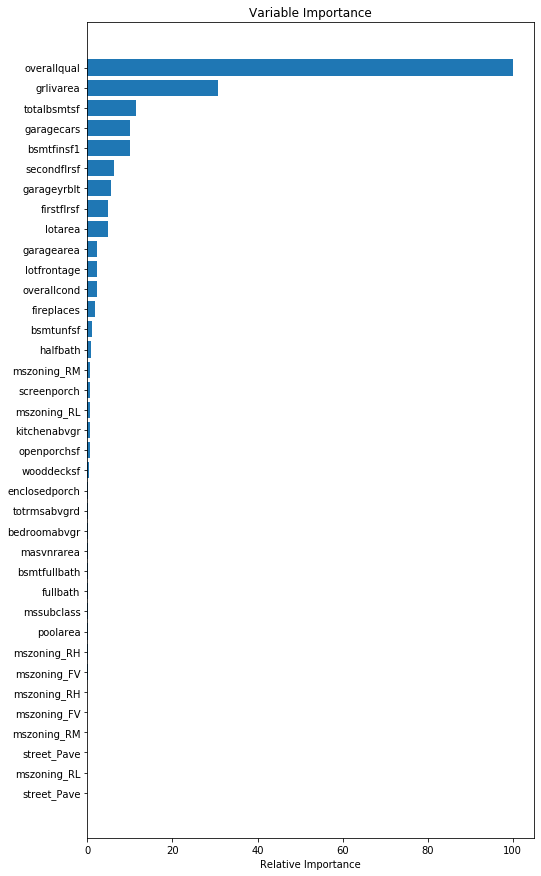

Selected Features for Gradientboosting [2.51271405e-04 1.10974040e-02 2.41481746e-02 5.04849512e-01
 1.07641695e-02 8.07738656e-04 5.08882992e-02 5.13259373e-03
 5.70834787e-02 2.41748486e-02 3.13155931e-02 1.55025287e-01
 6.33852134e-04 5.96996991e-04 3.95301726e-03 8.26963640e-04
 2.81982376e-03 9.29667204e-04 9.22359402e-03 2.76945479e-02
 5.09517710e-02 1.12291708e-02 2.24176737e-03 2.80034896e-03
 1.22004562e-03 2.91919382e-03 2.51053794e-04 4.69311258e-05
 8.18076163e-05 4.82257273e-05 9.12017543e-05 2.88151251e-03
 0.00000000e+00 2.66636130e-05 2.99347319e-03 0.00000000e+00
 0.00000000e+00]
GradientBoosting =  (0.9002614042620279, 25404.17585890906)


In [8]:

def ridge():
    regressor = Ridge(alpha=.3, normalize=True)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    return (regressor.score(X_test, y_test),sqrt(mean_squared_error(y_test, y_predictions)))


def lasso():
    regressor = Lasso(alpha=0.00009, normalize=True)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    return (regressor.score(X_test, y_test),sqrt(mean_squared_error(y_test, y_predictions)))


def elasticnet():
    regressor = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    return (regressor.score(X_test, y_test),sqrt(mean_squared_error(y_test, y_predictions)))


def randomforest():

    regressor = RandomForestRegressor(n_estimators=15,min_samples_split=15,criterion='mse',max_depth=None)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    #score=cross_val_score(regressor,X,y,cv=10)
    print("Selected Features for RamdomForest",regressor.feature_importances_)
    return (regressor.score(X_test, y_test),sqrt(mean_squared_error(y_test, y_predictions)))


def decisiontree():
    regressor = DecisionTreeRegressor( min_samples_split=30,max_depth=None)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    print("Selected Features for DecisionTrees",regressor.feature_importances_)
    return (regressor.score(X_test, y_test),sqrt(mean_squared_error(y_test, y_predictions)))


def gradientboosting():
    # make 500 iterations, use 2-deep trees
    regressor = GradientBoostingRegressor(loss='ls',n_estimators=500,max_depth=2, min_samples_split=15).fit(X_train, y_train)
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    # Start measure of how important various features are by counting how many times a feature is 
    # used over the course of many decision trees.
    feature_importance = regressor.feature_importances_

    # Make importances relative to max importance.
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(8,15))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.savefig("img/var_Importance.png", bbox_inches='tight', pad_inches=2)
    plt.show()
    # End Measure
    print("Selected Features for Gradientboosting",regressor.feature_importances_)
    return (regressor.score(X_test, y_test),sqrt(mean_squared_error(y_test, y_predictions)))



print ("Score, Root Mean Squared Error values")
print("_____________________________________________________________________________")
print ("Ridge = ",ridge())
print("_____________________________________________________________________________")
print ("Lasso = ",lasso())
print("_____________________________________________________________________________")
print ("ElasticNet = ",elasticnet())
print("_____________________________________________________________________________")
print ("RandomForest = ",randomforest())
print("_____________________________________________________________________________")
print ("DecisionTree = ",decisiontree())
print("_____________________________________________________________________________")
print ("GradientBoosting = ",gradientboosting())


#### It appears that overllqual and grlivarea are the most important features in predicting the house price.